# Sleep Health and Lifestyle

![20220701_am_adulting-revengesleep](20220701_am_adulting-revengesleep.avif)


Source: [todayonline.com](https://www.todayonline.com/singapore/adulting-101-i-take-revenge-my-lack-free-time-delaying-sleep-night-i-know-its-time-stop-1934691)

# Summary of Study Findings on Sleep Health

## Key Observations:

### Occupational Influence on Sleep:
- The study examined various professions including **doctors, nurses, accountants, engineers, lawyers, salespersons, and teachers**.
- It found that **occupational stress** and the nature of one's job can significantly impact **sleep quality**.

### Physical Health and Sleep:
- Analysis focused on **Body Mass Index (BMI) categories**, suggesting a link between **physical health**, particularly weight management, and sleep patterns.

## Insights from Data Analysis:
- **No missing data points**, indicating a comprehensive collection process.
- Majority of dataset consisted of specific professions, with less representation in categories like managers, sales representatives, scientists, and software engineers.
- Detailed analysis of categorical variables such as **occupation** and **BMI category** was conducted.

## Implications of Findings:
- Highlights the importance of considering one's **occupation and lifestyle** when addressing sleep health issues.
- The link between **BMI and sleep** suggests that maintaining a healthy weight could be beneficial for improving sleep quality.


# Loading all python modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import skew , kurtosis
from tabulate import tabulate
from scipy.stats import levene
from tabulate import tabulate

In this context, I'm importing a module named `scikit_posthocs` for conducting statistical analysis.

In [2]:
!pip install scikit_posthocs
import scikit_posthocs as sp

In [3]:
# Loading the data
sleep_data = pd.read_csv('sleep_health_data.csv')
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Checking the dataset
Checking for missing data using `info()` function.

In [4]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


As noted, there are no missing data points. We have 5 categorical variables and 8 numeric variables, totaling 13 variables.

Let's use the `describe()` function to gain further insights into the data.

In [5]:
sleep_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Here, we will utilize the `describe()` function, but with the `include='O'` argument. This will perform a brief analysis of the categorical variables, providing information on the quantity, the number of categories within each variable, the most frequent category, and the associated count for the most frequent category.

In [6]:
sleep_data.describe(include=['O'])

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,4,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,195,99,219


Evaluating the `Occupation` category.


In [7]:
sleep_data.groupby("Occupation")["Occupation"].count()

Occupation
Accountant              37
Doctor                  71
Engineer                63
Lawyer                  47
Manager                  1
Nurse                   73
Sales Representative     2
Salesperson             32
Scientist                4
Software Engineer        4
Teacher                 40
Name: Occupation, dtype: int64

We have a total of 11 professions, with the database predominantly consisting of *doctor*, *nurse*, *accountant*, *engineer*, *lawyer*, *salesperson*, and *teacher*. For an analysis involving this variable, it is recommended to exclude *manager* (1), *sales representative* (2), *scientist* (4), and *software engineer* (4) from the dataset. **These data points account for 2.95% of the dataset.**

Now, let's move on to the `BMI Category` variable:

In [8]:
sleep_data.groupby("BMI Category")["BMI Category"].count()

BMI Category
Normal           195
Normal Weight     21
Obese             10
Overweight       148
Name: BMI Category, dtype: int64

The `BMI Category` variable poses a concern due to the presence of both *Normal* and *Normal Weight* values, which, upon closer examination, appear to convey the same information. To address this inconsistency, we will standardize all instances under the label *Normal*.

In [9]:
sleep_data["BMI Category"] = sleep_data["BMI Category"].replace("Normal Weight", "Normal")
sleep_data.groupby("BMI Category")["BMI Category"].count()

BMI Category
Normal        216
Obese          10
Overweight    148
Name: BMI Category, dtype: int64

Next, we'll evaluate the `Blood Pressure` variable:

In [10]:
sleep_data.groupby("Blood Pressure")["Blood Pressure"].count()

Blood Pressure
115/75    32
115/78     2
117/76     2
118/75     2
118/76     1
119/77     2
120/80    45
121/79     1
122/80     1
125/80    65
125/82     4
126/83     2
128/84     2
128/85     3
129/84     2
130/85    99
130/86     2
131/86     2
132/87     3
135/88     2
135/90    27
139/91     2
140/90     4
140/95    65
142/92     2
Name: Blood Pressure, dtype: int64

This variable presents some challenges, particularly due to categories with low counts. However, it's worth noting that the American College of Cardiology, in collaboration with the American Heart Association, has published guidelines for classification. You can find more information on this at [CDC.gov](https://www.cdc.gov/bloodpressure/facts.htm).

| Blood Pressure Category | Systolic Blood Pressure | Diastolic Blood Pressure |
|-------------------------|-------------------------|--------------------------|
|   Normal                | <120 mmHg               | and <80 mmHg             |
|   Elevated              | 120-129 mmHg            | and <80 mmHg             |
| Hypertension            |                         |                          |
|   Stage 1               | 130-139 mmHg            | or 80-89 mmHg            |
|   Stage 2               | ≥140 mmHg               | or ≥90 mmHg              |

I will now create a function called `categorize_blood_pressure`, which takes an argument *bp_string*. This argument corresponds to the value assigned in the `Blood Pressure` column and evaluates the following conditions:

* **Normal Blood Pressure** - if the systolic pressure is less than 120 and the diastolic pressure is less than 80.
* **Elevated Blood Pressure** - if the systolic pressure falls between 120 (inclusive) and 129 (inclusive) and the diastolic pressure is less than 80.
* **Stage 1 Hypertension** - if the systolic pressure falls between 130 (inclusive) and 139 (inclusive), or if the diastolic pressure falls between 80 (inclusive) and 89 (inclusive).
* **Stage 2 Hypertension** - if the systolic pressure is greater than or equal to 140, or if the diastolic pressure is greater than or equal to 90.
* **Undefined** - if the information does not fit into any of the above categories.

In [11]:
def categorize_blood_pressure(bp_string):
    """
    Categorize the blood pressure based on the provided table.
    Extracts systolic and diastolic values directly from the string.
    """
    systolic, diastolic = map(int, bp_string.split('/'))
    
    if systolic < 120 and diastolic < 80:
        return "Normal"
    elif 120 <= systolic <= 129 and diastolic < 80:
        return "Elevated"
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return "Hypertension Stage 1"
    elif systolic >= 140 or diastolic >= 90:
        return "Hypertension Stage 2"
    else:
        return "Undefined"

# Apply the updated categorization function
sleep_data["Blood Pressure Category"] = sleep_data['Blood Pressure'].apply(categorize_blood_pressure)

sleep_data.groupby("Blood Pressure Category")["Blood Pressure Category"].count()

# Drop Blood Pressure column
sleep_data.drop(columns="Blood Pressure", inplace=True)

We have just one instance categorized as *Elevated* for `Blood Pressure`. As illustrated below, this individual is classified as *None* for `Sleep Disorder`.

In [12]:
sleep_data[sleep_data["Blood Pressure Category"] == "Elevated"]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Category
166,167,Male,41,Engineer,7.3,8,70,6,Normal,72,6200,None,Elevated


### Comparing categorical variables

We will compare the categorical variables using the Pandas `crosstab()` function to evaluate which statistical test we can apply.

In [13]:
# Occupation vs. Sleep Disorder

occupation_sleep_crosstab = pd.crosstab(sleep_data["Occupation"], sleep_data["Sleep Disorder"])

occupation_sleep_crosstab


Sleep Disorder,Insomnia,None,Sleep Apnea
Occupation,,,
Accountant,7,30,0
Doctor,3,64,4
Engineer,5,57,1
Lawyer,2,42,3
Manager,0,1,0
Nurse,3,9,61
Sales Representative,0,0,2
Salesperson,29,2,1
Scientist,0,2,2


This variable is the most challenging to apply the chi-squared test to. We can exclude the professions that we detected with low counts in the variable and apply the Marascuilo procedure.

The [Marascuilo procedure](https://www.itl.nist.gov/div898/handbook/prc/section4/prc474.htm) is a method used to compare proportions in contingency tables that have more than two categories. The Marascuilo test allows for identifying which specific proportions in a contingency table significantly differ from one another.

When examining categorical variables in more detail, it's important to note that to conduct a [Chi-Squared Test](https://towardsdatascience.com/compare-dependency-of-categorical-variables-with-chi-square-test-982baff64e81), we need each category to have at least 5 counts. If there are between 5 to 10 counts, we need to apply the Yates correction (only tables 2x2). If we have fewer than 5 counts in a category, we might consider excluding it and only evaluating the remaining ones.

In [14]:
# Create a crosstab for BMI Category and Sleep Disorder
bmi_sleep_crosstab = pd.crosstab(sleep_data["BMI Category"], sleep_data["Sleep Disorder"])

bmi_sleep_crosstab

Sleep Disorder,Insomnia,None,Sleep Apnea
BMI Category,,,
Normal,9,200,7
Obese,4,0,6
Overweight,64,19,65


For `BMI Category` and `Sleep Disorder`: We have a 3x3 table and counts below 5. Perhaps we can exclude the *Obese* category and make some 2x2 comparisons, or we could try the Marascuilo procedure.



In [15]:
# Create a crosstab for Gender and Sleep Disorder
gender_sleep_crosstab = pd.crosstab(sleep_data["Gender"], sleep_data["Sleep Disorder"])

gender_sleep_crosstab

Sleep Disorder,Insomnia,None,Sleep Apnea
Gender,,,
Female,36,82,67
Male,41,137,11


For gender, we have counts with values above 10, so we can apply the chi-squared test without the use of any correction.

In [16]:
# Create a crosstab for Blood Pressure Category and Sleep Disorder

blood_sleep_crosstab = pd.crosstab(sleep_data["Blood Pressure Category"], sleep_data["Sleep Disorder"])

blood_sleep_crosstab


Sleep Disorder,Insomnia,None,Sleep Apnea
Blood Pressure Category,,,
Elevated,0,1,0
Hypertension Stage 1,71,174,16
Hypertension Stage 2,5,5,61
Normal,1,39,1


Well, as expected, the *Elevated* category in `Blood Pressure Category` needs to be discarded. Consequently, the *Normal* category is also indicated to be removed. Moreover, we would need to apply the Yates correction, or we could also apply the Marascuilo correction.

**I regret to inform the reader that, unfortunately, I was unable to conduct hypothesis tests between the categorical variables due to certain constraints.**

In [17]:
occupations = ["Manager", "Sales Representative", "Scientist", "Software Engineer"]

# Use the isin() method to filter the rows with the desired occupations.
filtered_result = sleep_data[sleep_data['Occupation'].isin(occupations)]

# The filtered result now contains only the rows with the desired categories.
filtered_result

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Category
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,Hypertension Stage 1
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Hypertension Stage 2
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Hypertension Stage 2
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,Hypertension Stage 2
68,69,Female,33,Scientist,6.2,6,50,6,Overweight,76,5500,None,Hypertension Stage 1
69,70,Female,33,Scientist,6.2,6,50,6,Overweight,76,5500,None,Hypertension Stage 1
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,81,5200,Sleep Apnea,Hypertension Stage 1
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,81,5200,Sleep Apnea,Hypertension Stage 1
84,85,Male,35,Software Engineer,7.5,8,60,5,Normal,70,8000,None,Hypertension Stage 1
92,93,Male,35,Software Engineer,7.5,8,60,5,Normal,70,8000,None,Hypertension Stage 1


In [18]:
to_drop = list(filtered_result.index)+[163]
to_drop
# I'm going to use this variable to drop rows at the end for training the model. I will also employ undersampling techniques.

[0, 3, 4, 5, 68, 69, 80, 81, 84, 92, 263, 163]

Here's a concise summary of our analysis (categorical variable):

- **BMI Category** - 3 Obese, 6 Overweight, 2 Normal
- **Sleep Disorder** - 4 Sleep Apnea, 1 Insomnia, 6 None
- **Blood Pressure Category** - 8 Hypertension Stage 1, 3 Hypertension Stage 2
- **Gender** - 6 Males, 5 Females

Finally, let's count the number of categories in the `Sleep Disorder` variable.

In [19]:
# Counting the number of categories in the Sleep Disorder variable.
sleep_data.groupby("Sleep Disorder")["Sleep Disorder"].count()

Sleep Disorder
Insomnia        77
None           219
Sleep Apnea     78
Name: Sleep Disorder, dtype: int64

We observe a notable imbalance in the *None* category compared to the other categories (`Sleep Disorder`). When considering the construction of a machine learning model, I recommend implementing undersampling. Given that *Insomnia* has the fewest records, with a count of 77, I propose setting this as the maximum number of records for each category.

# **Which factors could contribute to a sleep disorder?**
To answer this, we'll investigate relationships between having a sleep disorder and various factors such as age, sleep duration, physical activity level, stress level, BMI category, blood pressure, and heart rate.



The initial analysis to conduct involves assessing `Sleep Disorder` in relation to the numerical variables.

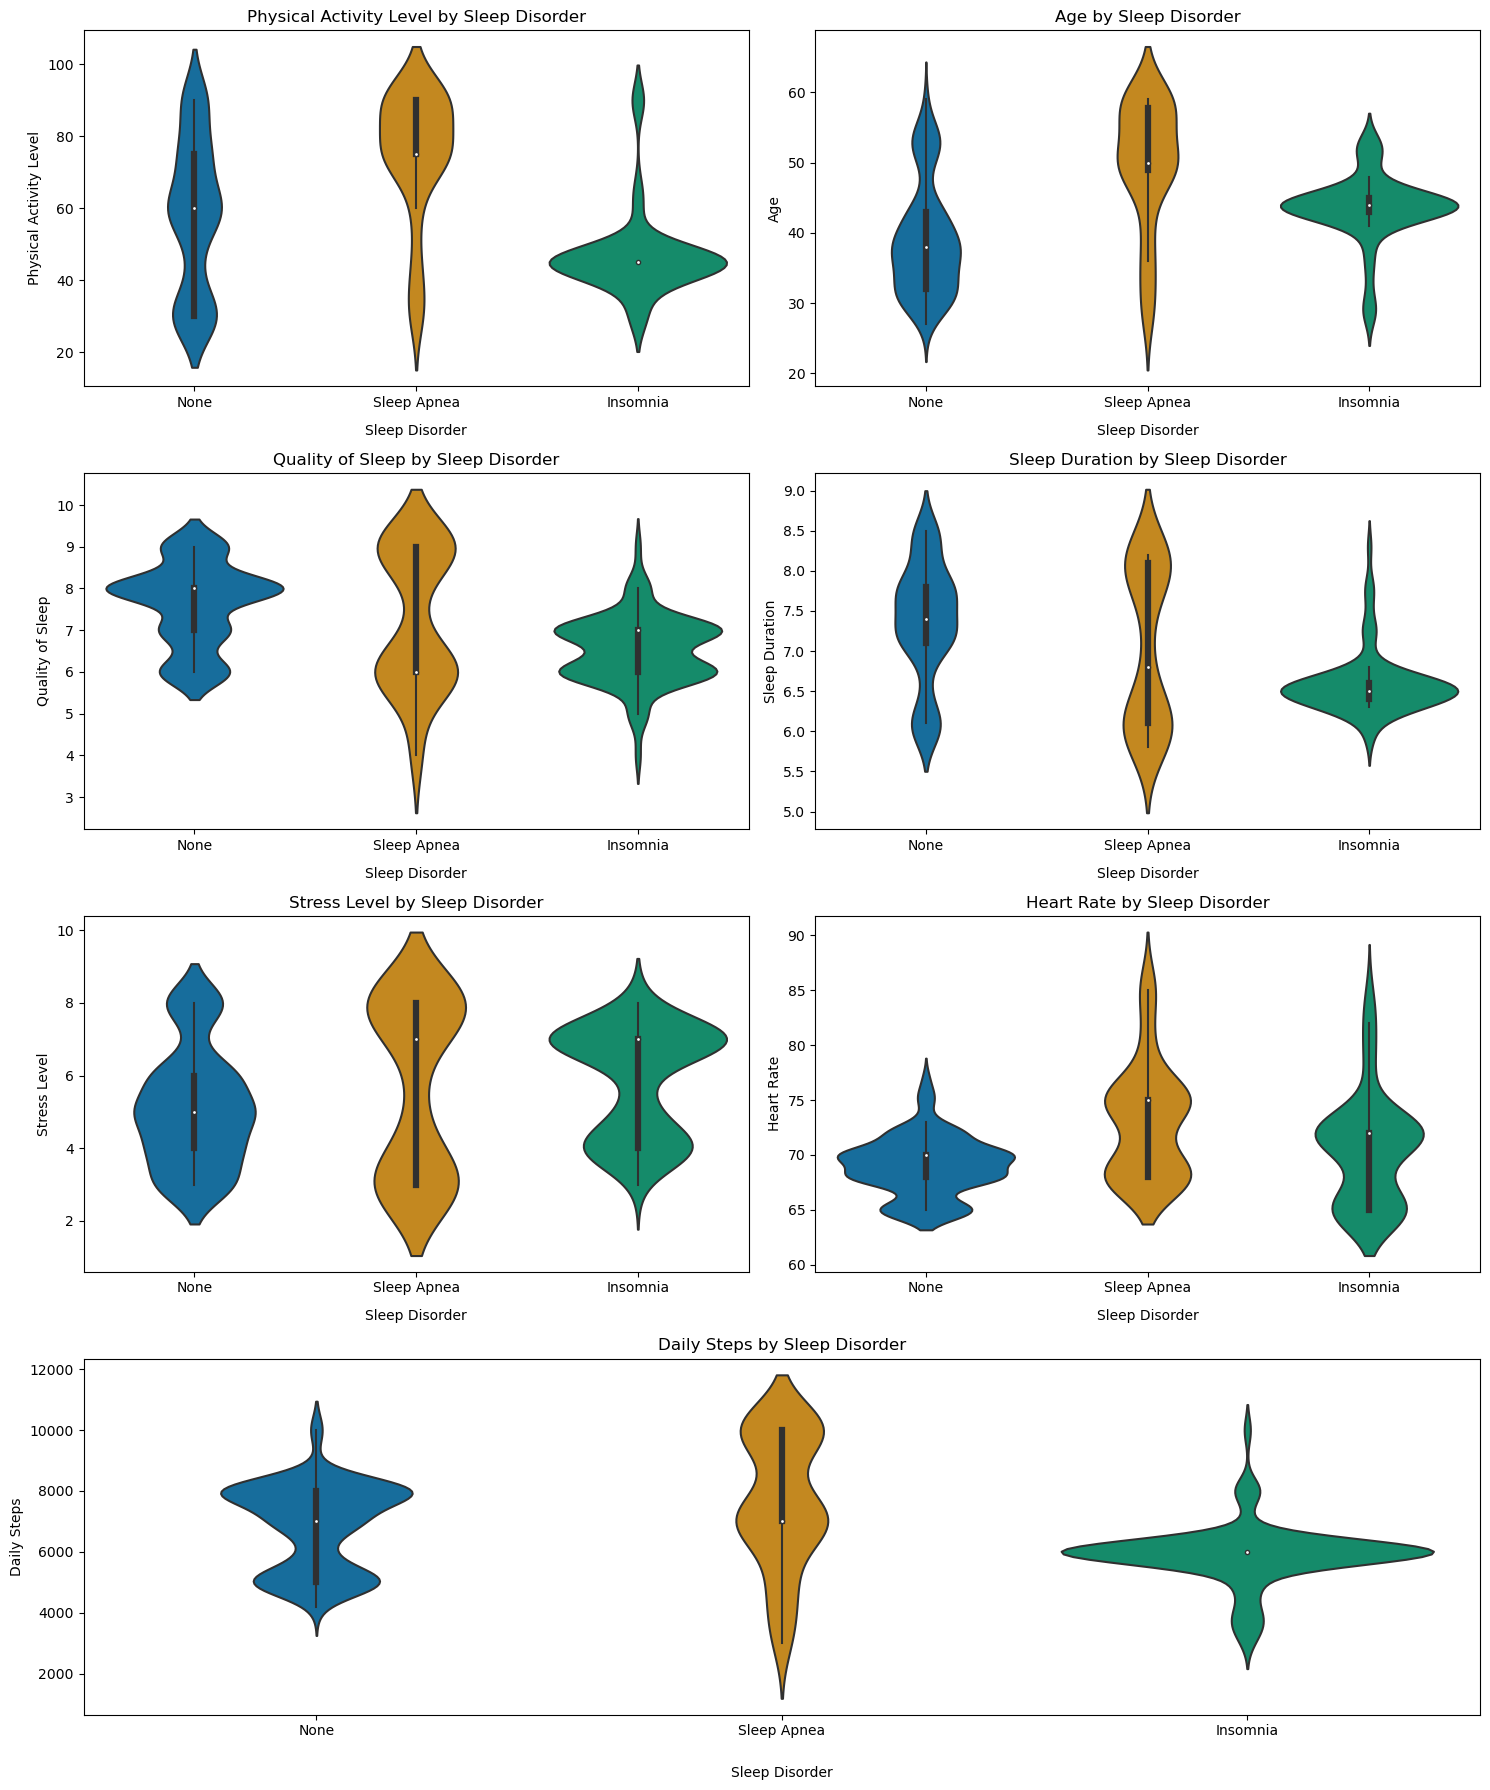

In [20]:
# Adjusting the layout to have "Daily Steps" span two columns at the bottom
grid_columns = ["Physical Activity Level", "Age",  "Quality of Sleep", "Sleep Duration","Stress Level", "Heart Rate"]
spanning_column = ["Daily Steps"]
fig = plt.figure(figsize=(15, 18))

# Plotting the 3x2 grid of metrics
for i, column in enumerate(grid_columns):
    ax = fig.add_subplot(4, 2, i+1)
    sns.violinplot(x="Sleep Disorder", y=column, data=sleep_data, palette=sns.color_palette("colorblind"), ax=ax)
    ax.set_title(f'{column} by Sleep Disorder')
    ax.secondary_xaxis('top').set_ticks([])
    ax.secondary_yaxis('right').set_ticks([])
    ax.set_xlabel("Sleep Disorder", labelpad=10)  # Adjusting labelpad for x-axis
    sns.despine(ax=ax)

# Plotting the spanning graph for "Daily Steps" at the bottom
ax_spanning = fig.add_subplot(4, 1, 4)
sns.violinplot(x="Sleep Disorder", y=spanning_column[0], data=sleep_data, palette=sns.color_palette("colorblind"), ax=ax_spanning)
ax_spanning.set_title(f'{spanning_column[0]} by Sleep Disorder')
ax_spanning.set_xlabel("Sleep Disorder", labelpad=20)  # Adjusting labelpad for x-axis
ax_spanning.secondary_xaxis('top').set_ticks([])
ax_spanning.secondary_yaxis('right').set_ticks([])
sns.despine(ax=ax_spanning)

plt.tight_layout()
plt.show()


In [21]:
# Calculating quantiles for each metric grouped by "Sleep Disorder"
quantiles = sleep_data.groupby("Sleep Disorder").quantile([0.25, 0.5, 0.75])

# Resetting the index for better formatting
quantiles_reset = quantiles.reset_index()

# Filtering only the required columns
required_columns = ["Physical Activity Level", "Age",  "Quality of Sleep", 
                    "Sleep Duration","Stress Level", "Heart Rate","Daily Steps"]
quantiles_filtered = quantiles_reset[["Sleep Disorder", "level_1"] + required_columns]

# Melting the data for a long format to create the desired table format
long_format_quantiles = quantiles_filtered.melt(id_vars=["Sleep Disorder", "level_1"], 
                                               value_vars=required_columns)

# Pivoting the data for the desired output
pivot_quantiles = long_format_quantiles.pivot_table(index=["Sleep Disorder", "variable"], 
                                                    columns="level_1", 
                                                    values="value").reset_index()

# Sorting the data as per the given format
sorted_quantiles = pivot_quantiles.sort_values(by=["variable", "Sleep Disorder"])

sorted_quantiles.loc[1:,:]

C:\Users\Mukesh\AppData\Local\Temp\ipykernel_5172\3302438547.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantiles = sleep_data.groupby("Sleep Disorder").quantile([0.25, 0.5, 0.75])


level_1,Sleep Disorder,variable,0.25,0.5,0.75
1,Insomnia,Daily Steps,6000.0,6000.0,6000.0
8,None,Daily Steps,5000.0,7000.0,8000.0
15,Sleep Apnea,Daily Steps,7000.0,7000.0,10000.0
2,Insomnia,Heart Rate,65.0,72.0,72.0
9,None,Heart Rate,68.0,70.0,70.0
16,Sleep Apnea,Heart Rate,68.0,75.0,75.0
3,Insomnia,Physical Activity Level,45.0,45.0,45.0
10,None,Physical Activity Level,30.0,60.0,75.0
17,Sleep Apnea,Physical Activity Level,75.0,75.0,90.0
4,Insomnia,Quality of Sleep,6.0,7.0,7.0


`Physical Activity Level` by `Sleep Disorder`: Individuals with *Sleep Apnea* appear to have a slightly higher median daily physical activity compared to the other groups, while individuals with *Insomnia* exhibit a lower median in physical activity.

`Age` by `Sleep Disorder`: Individuals without sleep disorders (*None*) demonstrate a broader age distribution. In contrast, individuals with *Insomnia* and *Sleep Apnea* tend to have a higher median age compared to those without sleep disorders.

`Quality of Sleep` by `Sleep Disorder`: Sleep quality is notably lower for individuals with *Insomnia* and *Sleep Apnea*, which aligns with expectations given the nature of these disorders.

`Sleep Duration` by `Sleep Disorder`: Sleep duration is slightly lower for individuals with *Insomnia* and *Sleep Apnea*, reflecting the impact of these disorders on sleep patterns.

`Stress Level` by `Sleep Disorder`: Individuals with *Sleep Apnea* exhibit slightly higher stress levels, as do individuals experiencing *Insomnia*.

`Heart Rate` by `Sleep Disorder`: The median heart rate appears to be similar among the groups, but individuals with *Sleep Apnea* display slightly greater variability.

`Daily Steps` by `Sleep Disorder`: Daily step counts do not show significant variations among the different sleep disorder groups.

These visualizations highlight how sleep disorders may impact various aspects of health and lifestyle. For instance, individuals with *Insomnia* and *Sleep Apnea* tend to experience lower sleep quality and duration, along with slightly elevated stress levels. The next step is to proceed with statistical analysis.

# Hypothesis Testing

In our dataset, we have three states (categories) of `Sleep Disorder`: *None*, *Sleep Apnea*, and *Insommia*. To assess the potential differences among these categories, we can employ Analysis of Variance (ANOVA). However, before proceeding with ANOVA, it's crucial to ensure that certain assumptions are met and that ANOVA is appropriate for our dataset. Here are the steps to verify these assumptions:

1. **Check Data Nature**: First, confirm that our data is continuous. ANOVA is suitable for continuous data, not categorical.

2. **Number of Groups**: Verify that we have three or more independent groups, which we have in this case.

3. **Independence**: Ensure that observations within each group are independent of each other. This means that the results for one state should not influence the results for another.

4. **Equal Variances**: Conduct a test of equality of variances, such as the Levene or Bartlett test, to determine if variances across groups are approximately equal. If variances significantly differ among groups, ANOVA may not be appropriate.

5. **Normality**: Check for the normality of data within each group using a normality test like the Shapiro-Wilk test. While ANOVA is more robust to violations of this assumption in large samples, it's essential to verify normality.

6. **Select the ANOVA Type**:
   - One-Way ANOVA: For a single factor (independent variable).
   - Two-Way ANOVA: When you have two factors (independent variables).
   - Three-Way ANOVA: When you have three factors (independent variables).
   - For more factors, multi-way ANOVAs can be used.

## Analysis

Based on our dataset, we are comparing continuous variables across three states, satisfying condition `1`. We have three independent groups, meeting condition `2`. Let's move on to condition `3`. To assess independence, we will apply the Levene test:

The Levene test is a statistical test used to check the homogeneity of variances across groups, a critical assumption for many ANOVA variations. It tests the null hypothesis that the variances among groups are equal (homogeneity of variances), against the alternative that at least one variance among groups is different (no homogeneity of variances).

- Null Hypothesis ($H_0$): Variances among groups are equal (homogeneity of variances).
- Alternative Hypothesis ($H_1$): At least one variance among groups is different (no homogeneity of variances).

If the p-value associated with the test statistic exceeds a chosen significance level (typically 0.05), we do not reject the null hypothesis, indicating that there is no statistical evidence of significant differences in variances among groups (i.e., homogeneity of variances is met). Conversely, if the p-value falls below the significance level, we reject the null hypothesis, suggesting evidence that at least one variance among groups is different, meaning homogeneity of variances is not met.

For this analysis, I will use a significance level of 0.05. Below is the code to perform the Levene test:


In [22]:
# Dictionary to store the results of the Levene test for each metric
levene_results = {}
columns_to_plot = ["Physical Activity Level", "Age",  "Quality of Sleep", "Sleep Duration","Stress Level", "Heart Rate","Daily Steps"]
# Perform the Levene test for each metric against "Sleep Disorder"
for column in columns_to_plot:
    groups = [sleep_data[column][sleep_data["Sleep Disorder"] == disorder] for disorder in sleep_data["Sleep Disorder"].unique()]
    stat, p = levene(*groups)
    levene_results[column] = (stat, p)

df = pd.DataFrame(levene_results, index=['Test Statistic', 'p-value']).T

# Generate the LaTeX table
latex_code = tabulate(df, tablefmt="github", headers="keys")
print(latex_code)

|                         |   Test Statistic |     p-value |
|-------------------------|------------------|-------------|
| Physical Activity Level |          26.6379 | 1.54914e-11 |
| Age                     |          15.1357 | 4.79805e-07 |
| Quality of Sleep        |          23.132  | 3.40908e-10 |
| Sleep Duration          |          60.25   | 2.1941e-23  |
| Stress Level            |          19.9328 | 5.99156e-09 |
| Heart Rate              |          18.8187 | 1.643e-08   |
| Daily Steps             |          33.9368 | 2.91664e-14 |


# Hypothesis Testing

Since all the p-values are less than 0.05, we reject the null hypothesis ($H_0$) and accept the alternative hypothesis ($H_1$). This implies that there is evidence of at least one variance among the groups being different, indicating that homogeneity of variances is not met. Therefore, we cannot use ANOVA.

We have several strategies to address this issue. One approach is to use the Welch's Test, as the main requirement is that variances between groups are unequal, which has been verified in the previous step. The other requirement pertains to the normality of data. While ANOVA is sensitive to the violation of the normality assumption, especially with small sample sizes, Welch's Test is less sensitive to this violation, making it a robust choice regarding data normality. If normality is not met, it's essential to consider data skewness. If the data is heavily skewed, it can affect the interpretation of results. You may explore data transformations, such as logarithmic transformation, if appropriate, to make the data more symmetric before conducting the analysis.

### Checking Data Normality and Skewness

Below is code to visualize the distribution of variables:


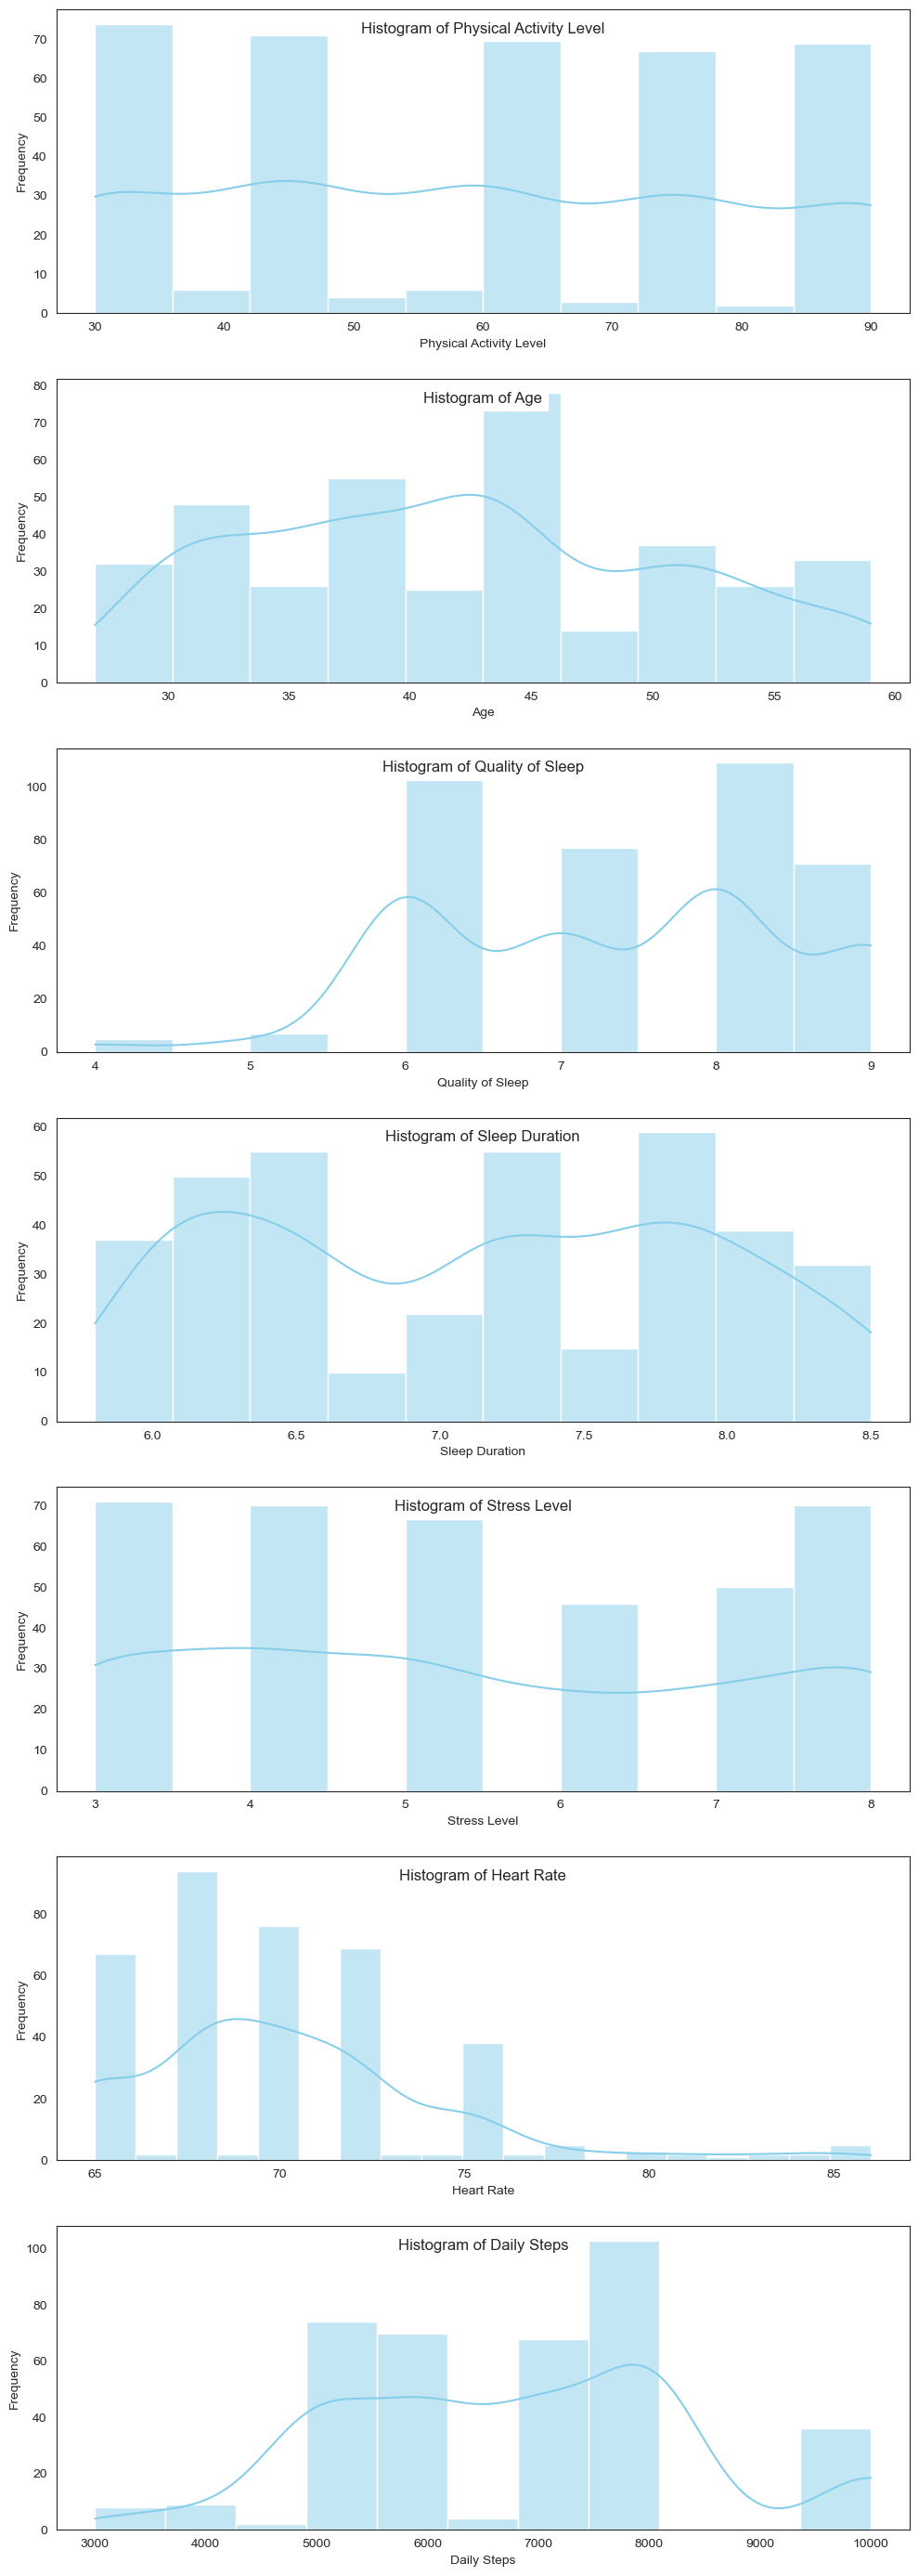

In [23]:
sns.set_style("white")
# Create histograms for the specified columns
fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 4 * len(columns_to_plot)))

for ax, column in zip(axes, columns_to_plot):
    sns.histplot(sleep_data[column], kde=True, ax=ax, color="skyblue")
    ax.secondary_xaxis('top').set_ticks([])
    ax.secondary_yaxis('right').set_ticks([])
    ax.set_title(f'Histogram of {column}', y=0.9, backgroundcolor='white', pad=5)  

    ax.set_ylabel('Frequency')
    sns.despine(ax=ax)
    
plt.subplots_adjust(hspace=10.5)
plt.tight_layout()
plt.show()

Let's check the issue of skewness, for which we can use skewness alone, but I'll also evaluate kurtosis.

Skewness:

- $ > 0:$ Right-skewed distribution (positive skewness)
- $ = 0:$ Symmetrical distribution
- $ < 0:$ Left-skewed distribution (negative skewness)


Kurtosis:

- $ > 0:$ Leptokurtic distribution (heavier tails and a sharper peak compared to the normal distribution)
- $ = 0:$ Mesokurtic distribution (similar to the normal distribution in terms of kurtosis)
- $ < 0:$ Platykurtic distribution (lighter tails and a less sharp peak compared to the normal distribution)

In [24]:
# Calculate skewness and kurtosis without Shapiro-Wilk test
results = []
for col in columns_to_plot:
    sk = skew(sleep_data[col])
    kurt = kurtosis(sleep_data[col])
    
    symmetry = "Symmetric" if -0.5 <= sk <= 0.5 else "Not Symmetric"
    
    results.append([col, sk, kurt, symmetry])

# Convert results to a DataFrame for better display
results_df = pd.DataFrame(results, columns=['Column', 'Skewness', 'Kurtosis','Symmetry'])
results_df

,Column,Skewness,Kurtosis,Symmetry
0,Physical Activity Level,0.074188,-1.265205,Symmetric
1,Age,0.256189,-0.913662,Symmetric
2,Quality of Sleep,-0.206615,-0.754309,Symmetric
3,Sleep Duration,0.037404,-1.285371,Symmetric
4,Stress Level,0.153710,-1.325628,Symmetric
5,Heart Rate,1.219906,2.240001,Not Symmetric
6,Daily Steps,0.177562,-0.404782,Symmetric


# Shapiro-Wilk Test
This is a hypothesis test used to determine whether a data sample comes from a normal distribution. It is particularly suitable for smaller samples (typically less than 50 observations), but can also be used with samples of up to about 2,000 observations. In our case, we have 374 samples, so the test is applicable.

The Shapiro-Wilk test has two hypotheses:

- Null Hypothesis ($H_0$): The sample follows a normal distribution.

- Alternative Hypothesis ($H_1$): The sample does not follow a normal distribution.

If the p-value resulting from the test is less than a certain significance level (usually 0.05), we reject the null hypothesis in favor of the alternative hypothesis. This means that there is sufficient evidence to believe that the sample does not follow a normal distribution. On the other hand, if the p-value is greater than the significance level, we do not reject the null hypothesis, indicating that there is not enough evidence to claim that the data does not follow a normal distribution.

In [25]:
# Applying Shapiro-Wilk test on the specified variables
shapiro_results = {}
for var in columns_to_plot:
    stat, p = shapiro(sleep_data[var])
    shapiro_results[var] = {"W-statistic": stat, "p-value": p}

shapiro_results_df = pd.DataFrame(shapiro_results).T
shapiro_results_df

,W-statistic,p-value
Physical Activity Level,0.899430,5.178644e-15
Age,0.958004,7.421343e-09
Quality of Sleep,0.893865,1.882132e-15
Sleep Duration,0.935765,1.266872e-11
Stress Level,0.890888,1.112158e-15
Heart Rate,0.882550,2.684890e-16
Daily Steps,0.936820,1.654560e-11


Observing the results above, we can reject our null hypothesis ($H_0$) that our distribution is normal and accept the alternative hypothesis ($H_1$) that our distribution does not follow a normal distribution.

Considering our results for both symmetry and normality, I don't feel comfortable applying the Welch's test to the dataset due to the low symmetry values (even under the imposed condition of classifying as symmetrical) and the fact that the variable `heart rate` is non-symmetrical. Additionally, our p-values for the Shapiro-Wilk test were extremely low.

An alternative to the Welch's test is the Kruskal-Wallis test, where we do not have the requirement of data normality or data homogeneity.

For the Kruskal-Wallis test, we have two hypotheses:

- Null Hypothesis ($H_0$): The medians of the populations from which the samples are drawn are all equal.
- Alternative Hypothesis ($H_1$): At least one of the medians of the populations is different from the others.

If the null hypothesis of the Kruskal-Wallis test is rejected, you can conclude that at least two groups are different, but you won't know which groups are different from each other. To determine this, you can perform post-hoc tests, such as the Dunn test, to compare pairs of groups.

Here is the analysis using the Kruskal-Wallis test:

In [26]:
# List of variables to test
variables_to_test = ["Physical Activity Level", "Age",  "Quality of Sleep", 
                     "Sleep Duration","Stress Level", "Heart Rate","Daily Steps"]

# Applying Kruskal-Wallis test for each variable
kruskal_results = {}
for variable in variables_to_test:
    groups = [sleep_data[variable][sleep_data["Sleep Disorder"] == disorder] for disorder in sleep_data["Sleep Disorder"].unique()]
    stat, p_value = kruskal(*groups)
    kruskal_results[variable] = (stat, p_value)

kruskal_results_df = pd.DataFrame(kruskal_results, index=["Statistic", "P-value"]).T
kruskal_results_df


,Statistic,P-value
Physical Activity Level,70.406535,5.145353e-16
Age,84.756989,3.937801e-19
Quality of Sleep,49.178905,2.093806e-11
Sleep Duration,43.898866,2.934151e-10
Stress Level,10.042155,6.597414e-03
Heart Rate,37.275207,8.049923e-09
Daily Steps,38.807177,3.742214e-09


All p-values are significantly smaller than 0.05, indicating that there is a statistically significant difference in the medians of the variables among the `Sleep Disorder` groups.

For the Kruskal-Wallis test, once you have established that there are differences between the groups, you can perform post-hoc comparisons using the Dunn test. The Dunn test is an extension of the Mann-Whitney U test for multiple comparisons and is appropriate for use after Kruskal-Wallis. Since the Dunn test involves comparing multiple pairs of groups, you need to make adjustments for multiple comparisons. A common method of adjustment is the Bonferroni method, but there are other methods that can be used depending on the context and researcher's preferences.

In [27]:
# List of variables to be tested
variables_to_test = ["Physical Activity Level", "Age",  "Quality of Sleep", 
                     "Sleep Duration","Stress Level", "Heart Rate","Daily Steps"]

dunn_results = {}

# Applying the Dunn test for each variable
for variable in variables_to_test:
    posthoc = sp.posthoc_dunn(sleep_data, val_col=variable, group_col='Sleep Disorder', p_adjust='bonferroni')
    dunn_results[variable] = posthoc

# The results will be stored in the 'dunn_results' dictionary. Each entry in the dictionary will contain
# an array of adjusted p-values for comparisons between the 'Sleep Disorder' groups for each variable.

In [28]:
# Initializing a list to store the formatted results.
formatted_results = []

# Iterating through the results to format them
for variable, matrix in dunn_results.items():
    for (group1, group2), p_value in matrix.unstack().items():
        # Adding the condition to avoid repeated comparisons.
        if group1 < group2:
            formatted_results.append({
                'Variable': variable,
                'Comparison': f"{group1} vs {group2}",
                'p-value': p_value
            })

# Converting the formatted list into a DataFrame.
formatted_df = pd.DataFrame(formatted_results)

# Pivoting the DataFrame for a more organized view.
consolidated_table = formatted_df.pivot(index='Variable', columns='Comparison', values='p-value')

def color_cells(val, threshold):
    if val > threshold:
        return 'background-color: red'
    else:
        return 'background-color: blue'
    
# Applying coloration to the DataFrame.
threshold = 0.01  # Set the reference value here.
styled_df = consolidated_table.style.applymap(lambda x: color_cells(x, threshold))

display(styled_df)

Comparison,Insomnia vs None,Insomnia vs Sleep Apnea,None vs Sleep Apnea
Variable,,,
Age,0.000001,0.008754,0.000000
Daily Steps,0.000004,0.000000,0.033734
Heart Rate,0.039299,0.010991,0.000000
Physical Activity Level,0.000225,0.000000,0.000000
Quality of Sleep,0.000000,0.000282,0.069140
Sleep Duration,0.000000,0.007733,0.012207
Stress Level,0.008953,1.000000,0.195327


The Kruskal-Wallis Test is a non-parametric technique that determines if three or more independent groups have different distributions. The Dunn Test is a post-hoc test that allows us to make pairwise comparisons between the groups after finding a significant difference with the Kruskal-Wallis Test.

In the table generated by the Dunn Test, we have p-values for comparisons between the three `Sleep Disorder` groups (*Insomnia*, *None*, and *Sleep Apnea*).

If the p-value is smaller than a significance level (usually 0.05), we reject the null hypothesis and conclude that the distributions of the groups are significantly different.

Here are the interpretations:

**Physical Activity Level:**

- `Insomnia vs. None`: Significantly different (p-value = 2.25e-04).
- `Insomnia vs. Sleep Apnea`: Significantly different (p-value = 3.79e-16).
- `None vs. Sleep Apnea`: Significantly different (p-value = 3.07e-09).

**Age:**

- `Insomnia vs. None`: Significantly different (p = 1.10e-06).
- `Insomnia vs. Sleep Apnea`: Significantly different (p = 8.75e-03).
- `None vs. Sleep Apnea`: Significantly different (p = 7.21e-18).

**Quality of Sleep:**

- `Insomnia vs. None`: Significantly different (p = 7.81e-12).
- `Insomnia vs. Sleep Apnea`: Significantly different (p = 2.82e-04).
- `None vs. Sleep Apnea`: Not significantly different (p = 0.069).

**Sleep Duration:**

- `Insomnia vs. None`: Significantly different (p = 2.20e-10).
- `Insomnia vs. Sleep Apnea`: Significantly different (p = 7.73e-03).
- `None vs. Sleep Apnea`: Not significantly different (p = 1.22e-02).

**Stress Level:**

- `Insomnia vs. None`: Significantly different (p = 8.95e-03).
- `Insomnia vs. Sleep Apnea`: Not significantly different (p = 1).
- `None vs. Sleep Apnea`: Not significantly different (p = 0.195).

**Heart Rate:**

- `Insomnia vs. None`: Not significantly different (p = 3.93e-02).
- `Insomnia vs. Sleep Apnea`: Not significantly different (p = 1.10e-02).
- `None vs. Sleep Apnea`: Significantly different (p = 4.83e-09).

**Daily Steps:**

- `Insomnia vs. None`: Significantly different (p = 4.10e-06).
- `Insomnia vs. Sleep Apnea`: Significantly different (p = 3.98e-09).
- `None vs. Sleep Apnea`: Not significantly different (p = 3.37e-02).

In summary, many of the metrics showed significant differences between the sleep disorder groups. However, some comparisons (such as `Quality of Sleep` between *None* and *Sleep Apnea*) did not show significant differences. These are just statistical comparisons and may require more context or clinical investigation to determine the practical relevance of these differences.


## Does an increased physical activity level result in a better quality of sleep?

We can perform a correlation analysis. There are various correlation coefficients, each with its characteristics:

- **Pearson Correlation:** Measures the linear relationship between two continuous variables. It's the most commonly used correlation coefficient. It assumes that **the data follows a normal distribution and that the relationship is linear**.

- **Spearman Correlation:** A non-parametric measure of the monotonic relationship between two variables. It's based on the ranks of the data rather than their values. It's useful when your **data doesn't have a normal distribution or when the relationship between the variables is not linear**.

- **Kendall Correlation:** Also a non-parametric measure of the relationship between two variables. **It's similar to Spearman correlation but is based on the number of concordances and discordances between pairs of data**.
- 
Since we already know that our data doesn't follow a normal distribution and the relationship isn't entirely linear, let's create graphs of the variable `Physical Activity Level` vs. `Quality of Sleep`. The first graph will consider all categories of `Sleep Disorder`, and the other three graphs (3 graphs) will be categorized for *None*,*Sleep Apnea*, and *Insomnia*. Each graph will show the **Spearman and Kendall correlation values**.

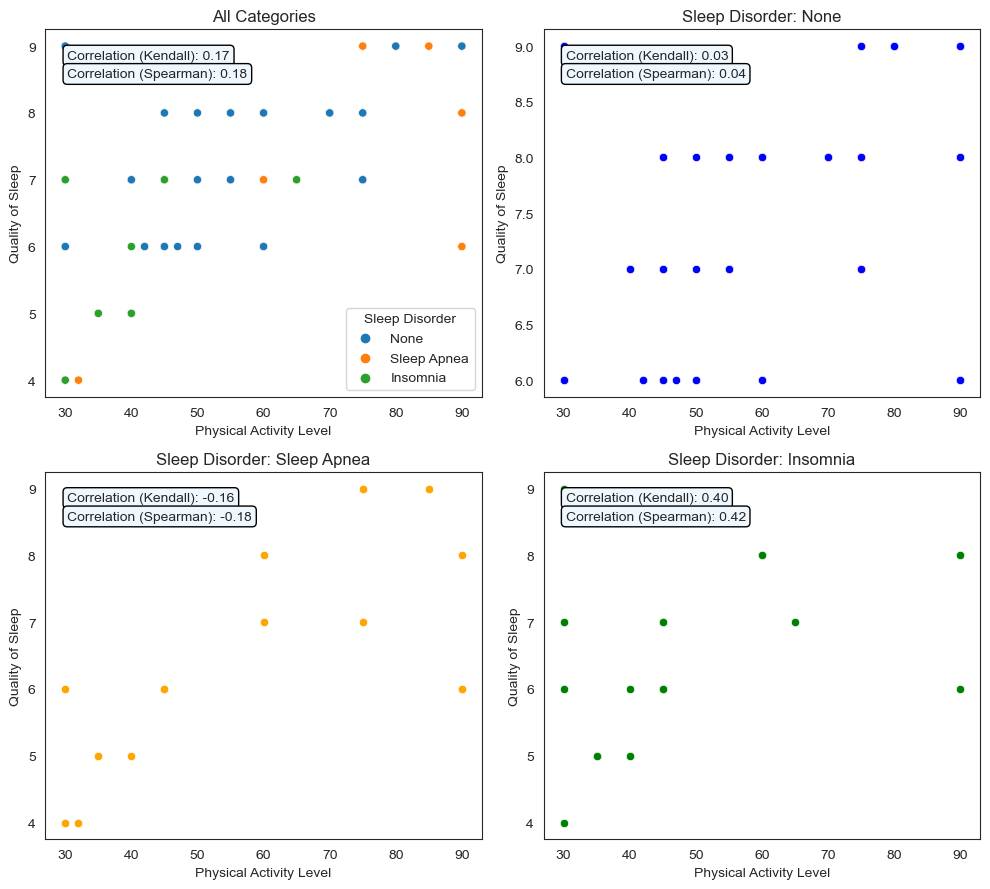

In [29]:
# Function to Add Correlation Value to the Graph
def annotate_corr(ax, data, x_var, y_var, method="kendall", xy=(0.05, 0.92)):
    corr_val = data[x_var].corr(data[y_var], method=method)
    ax.annotate(f"Correlation ({method.capitalize()}): {corr_val:.2f}", 
                xy=xy, 
                xycoords=ax.transAxes, 
                fontsize=10, 
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"))


# Create a panel with four graphs,
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9))

# Overall Chart with All Categories of 'Sleep Disorder"
sns.scatterplot(data=sleep_data, x="Physical Activity Level", y="Quality of Sleep", hue="Sleep Disorder", ax=axes[0, 0])
axes[0, 0].set_title("All Categories")
annotate_corr(axes[0, 0], sleep_data, "Physical Activity Level", "Quality of Sleep")
annotate_corr(axes[0, 0], sleep_data, "Physical Activity Level", "Quality of Sleep", method="spearman", xy=(0.05, 0.87))

# Chart to "Sleep Disorder" = None
sns.scatterplot(data=sleep_data[sleep_data["Sleep Disorder"] == "None"], x="Physical Activity Level", y="Quality of Sleep", ax=axes[0, 1], color='blue')
axes[0, 1].set_title("Sleep Disorder: None")
annotate_corr(axes[0, 1], sleep_data[sleep_data["Sleep Disorder"] == "None"], "Physical Activity Level", "Quality of Sleep")
annotate_corr(axes[0, 1],sleep_data[sleep_data["Sleep Disorder"] == "None"], "Physical Activity Level", "Quality of Sleep", method="spearman", xy=(0.05, 0.87))

# Chart to "Sleep Disorder" = Sleep Apnea
sns.scatterplot(data=sleep_data[sleep_data["Sleep Disorder"] == "Sleep Apnea"], x="Physical Activity Level", y="Quality of Sleep", ax=axes[1, 0], color='orange')
axes[1, 0].set_title("Sleep Disorder: Sleep Apnea")
annotate_corr(axes[1, 0], sleep_data[sleep_data["Sleep Disorder"] == "Sleep Apnea"], "Physical Activity Level", "Quality of Sleep")
annotate_corr(axes[1, 0], sleep_data[sleep_data["Sleep Disorder"] == "Sleep Apnea"], "Physical Activity Level", "Quality of Sleep", method="spearman", xy=(0.05, 0.87))

# Chart to "Sleep Disorder" = Insomnia
sns.scatterplot(data=sleep_data[sleep_data["Sleep Disorder"] == "Insomnia"], x="Physical Activity Level", y="Quality of Sleep", ax=axes[1, 1], color='green')
axes[1, 1].set_title("Sleep Disorder: Insomnia")
annotate_corr(axes[1, 1], sleep_data[sleep_data["Sleep Disorder"] == "Insomnia"], "Physical Activity Level", "Quality of Sleep")
annotate_corr(axes[1, 1], sleep_data[sleep_data["Sleep Disorder"] == "Insomnia"], "Physical Activity Level", "Quality of Sleep", method="spearman", xy=(0.05, 0.87))
plt.tight_layout()
plt.show()

Kendall's Correlation ($\tau$ of Kendall)

It's a correlation measure that evaluates the strength and direction of the association between two quantitative or ordinal variables. This test is based on the difference between the number of concordant and discordant pairs among the two variables. The value of $\tau$ ranges between -1 and 1, where 1 indicates perfect agreement, -1 indicates perfect disagreement, and 0 indicates no correlation. It is mainly used when the assumptions of linearity and homoscedasticity required for Pearson's correlation are not met.

- Null Hypothesis ($H_0$): There is no correlation between the two variables.
- Alternative Hypothesis ($H_1$): There is a correlation between the two variables.


In [30]:
from scipy.stats import kendalltau

#Applying the Kendall correlation test for each category of "Sleep Disorder"
def kendall_test(group):
    corr, p_val = kendalltau(group["Physical Activity Level"], group["Quality of Sleep"])
    return pd.Series({"Correlation": corr, "p-value": p_val})

kendall_results = sleep_data.groupby("Sleep Disorder").apply(kendall_test)
kendall_results

,Correlation,p-value
Sleep Disorder,,
Insomnia,0.404219,0.000097
None,0.032290,0.564465
Sleep Apnea,-0.160490,0.105066


In [31]:
kendalltau(sleep_data["Physical Activity Level"], sleep_data["Quality of Sleep"])

SignificanceResult(statistic=0.1747305600198957, pvalue=2.474053255201701e-05)

Based on our results, we can see that `None` and `Sleep Apnea` have a p-value greater than 0.05, so we can accept the Null Hypothesis, meaning there is no correlation between `Physical Activity Level` and `Quality of Sleep` for cases of `Sleep Apnea` and in the absence of any sleep disorders `None`. However, for the case of `Insomnia`, we have a p-value of 0.00009, which means we reject the Null Hypothesis and accept the Alternative Hypothesis; there is a correlation between the variables `Physical Activity Level` and `Quality of Sleep` for the case of `Insomnia`. This correlation is positive, with a value of 0.40, which we can state is a moderate correlation.

Observing the correlogram below, we have an analysis of the metrics without discretizing by `Sleep Disorder`. Here is the list of correlations with an absolute index greater than 0.70:

*	`Sleep Duration` vs. `Quality of Sleep` has a positive correlation of  0.89
*	`Stress Level` vs. `Quality of Sleep`  has a negative correlation of 0.91
*	`Stress Level` vs.`Sleep Duration`  has a negative correlation of 0.81
*	`Heart Rate` vs. `Quality of Sleep`  has a negative correlation of 0.73
*	`Heart Rate` vs. `Quality of Sleep` has a positive correlation of  de 0.82
*	`Daily Steps` vs. `Physical Activity Level` has a positive correlation of  0.79


When we discretize by `Sleep Disorder` categories, some interesting points emerge. Let's analyze the *None* case, still considering the cutoff point of 0.70.

*	`Daily Steps` vs. `Physical Activity Level` has a positive correlation of  0.78
*	`Quality of Sleep` vs. `Age` has a positive correlation of  0.75
*	`Sleep Duration` vs. `Quality of Sleep` has a positive correlation of  0.72
*	`Stress Level` vs. `Quality of Sleep`  has a negative correlation of 0.93
*	`Heart Rate` vs. `Quality of Sleep` t has a negative correlation of 0.83
*	`Heart Rate` vs. `Stress Level` has a positive correlation of  0.87



For the case of `Sleep Apnea`:


*	`Daily Steps` vs. `Physical Activity Level` has a positive correlation of  0.87
*	`Quality of Sleep` vs. `Age` has a positive correlation of  0.77
*	`Sleep Duration` vs. `Quality of Sleep` has a positive correlation of  0.89
*	`Stress Level` vs. `Quality of Sleep`  has a negative correlation of 0.91
*	`Stress Level` vs. `Sleep Duration`  has a negative correlation of 0.92
*	`Heart Rate` vs. `Age`  has a negative correlation of 0.76
*	`Heart Rate` vs. `Quality of Sleep`  has a negative correlation of 0.79
*	`Heart Rate` vs. `Sleep Duration`  has a negative correlation of 0.70
*	`Heart Rate` vs. `Stress Level` has a positive correlation of  0.73


For the case of `Insomnia`:

*	`Sleep Duration` vs. `Quality of Sleep` has a positive correlation of  0.79
*	`Stress Level` vs. `Quality of Sleep`  has a negative correlation of 0.78
*	`Heart Rate` vs. `Quality of Sleep`  has a negative correlation of 0.70
*	`Heart Rate` vs. `Stress Level` has a positive correlation of  0.86

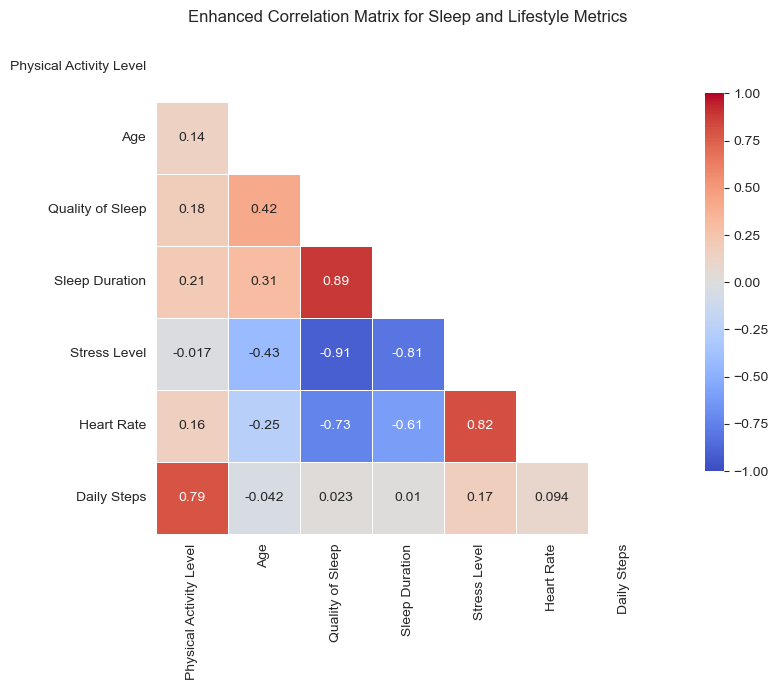

In [32]:
import numpy as np
# Compute correlation matrix for selected columns
correlation_cols = ["Physical Activity Level", "Age",  "Quality of Sleep", "Sleep Duration","Stress Level", "Heart Rate","Daily Steps"]
correlation_matrix = sleep_data[correlation_cols].corr(method="spearman")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure and a custom diverging colormap
plt.figure(figsize=(10, 7))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", annot=True, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Enhanced Correlation Matrix for Sleep and Lifestyle Metrics')
plt.tight_layout()
plt.show()

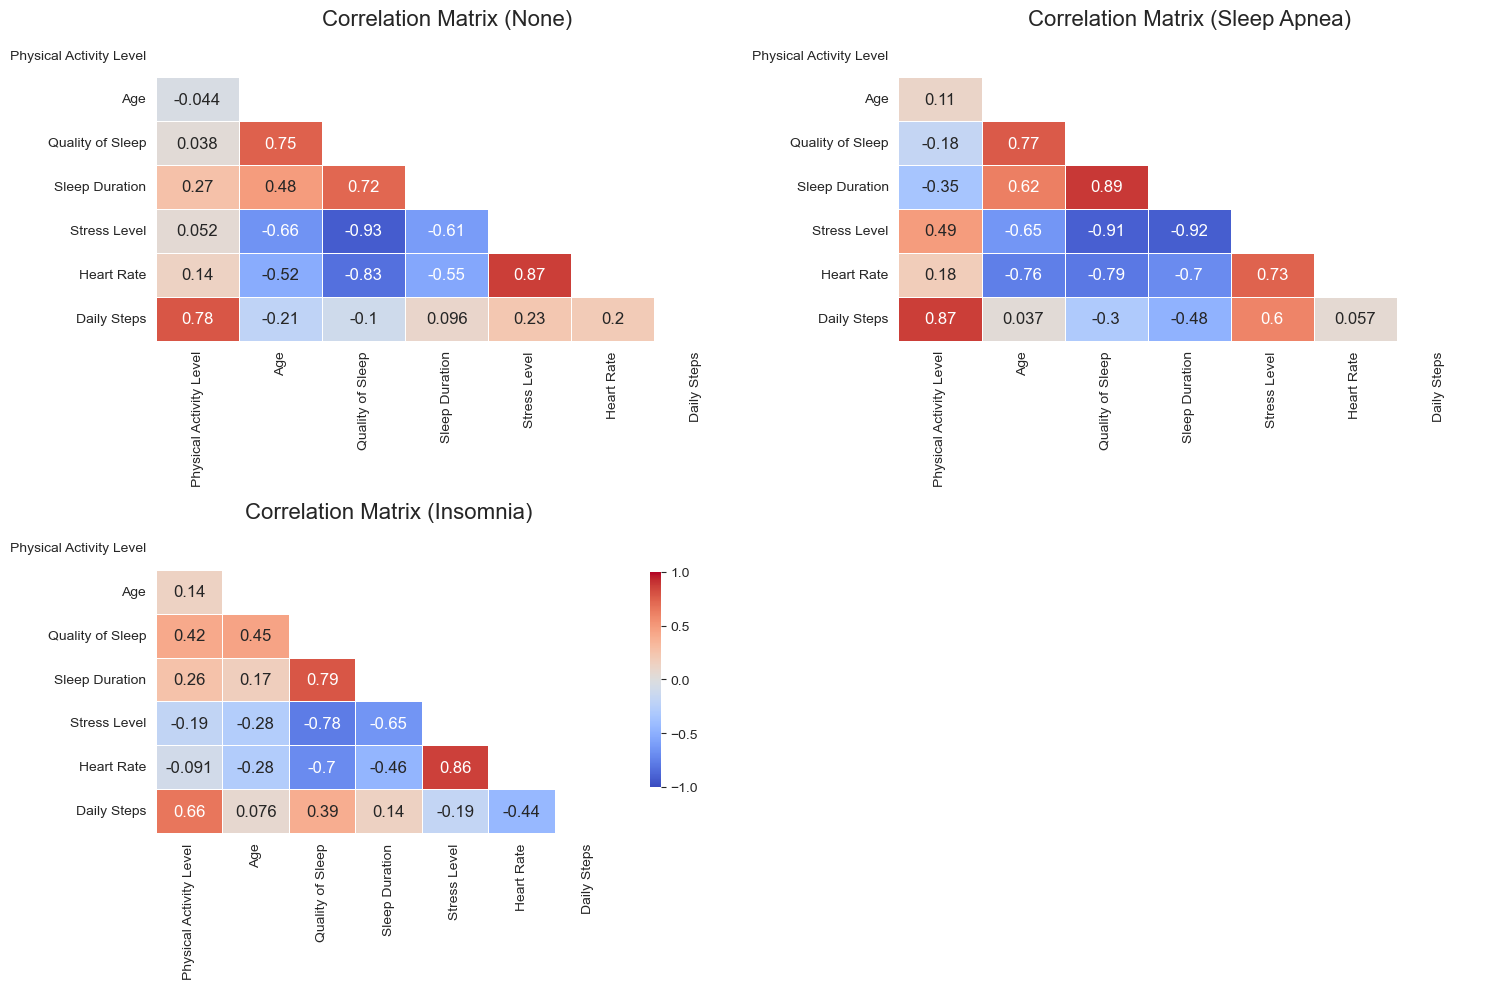

In [33]:
# List of "Sleep Disorder" Categories
sleep_disorders = sleep_data["Sleep Disorder"].unique()

# Updated function to plot the correlation matrix with only the lower triangular part
def plot_lower_triangular_corr(data, title, show_colorbar):
    corr_matrix = data.corr(method="spearman")
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1, linewidths=.5, 
                cbar_kws={"shrink": 0.7}, mask=mask, cbar=show_colorbar, annot_kws={"fontsize": 12})

# Plotting the discretized correlation matrices again with adjustments
plt.figure(figsize=(15, 10))
for index, disorder in enumerate(sleep_disorders, 1):
    plt.subplot(2, 2, index)
    correlation_data_discrete = sleep_data[sleep_data["Sleep Disorder"] == disorder][correlation_cols]
    show_colorbar = True if disorder == sleep_disorders[-1] else False
    plot_lower_triangular_corr(correlation_data_discrete, f"Correlation Matrix ({disorder})", show_colorbar)
    plt.title(f"Correlation Matrix ({disorder})", fontsize=16)

plt.tight_layout()
plt.show()


In [34]:
# Here, I'm using the "to_drop" variable to delete some rows.
sleep_data.drop(to_drop, inplace=True)
sleep_data['Sleep Disorder'].value_counts()

None           212
Insomnia        76
Sleep Apnea     74
Name: Sleep Disorder, dtype: int64

Here, I will perform undersampling using the category with the least amount of data. I will do this in order to achieve a balanced model.

In [35]:
def undersample_data(data, column, n_samples, random_state=42):  
    return pd.concat([data[data[column] == category].sample(n_samples, random_state=random_state) 
                      for category in data[column].unique()])
sampled_data = undersample_data(sleep_data, 'Sleep Disorder', 74)
sampled_data.drop(columns=["Person ID"], inplace=True)

In [36]:
sampled_data['Sleep Disorder'].value_counts()

None           74
Insomnia       74
Sleep Apnea    74
Name: Sleep Disorder, dtype: int64

In [37]:
sampled_data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Category
40,Male,31,Doctor,7.7,7,75,6,Normal,70,8000,None,Hypertension Stage 1
267,Female,49,Nurse,6.2,6,90,8,Overweight,75,10000,None,Hypertension Stage 2
169,Male,41,Lawyer,7.7,8,90,5,Normal,70,8000,None,Hypertension Stage 1
95,Female,36,Accountant,7.1,8,60,4,Normal,68,7000,None,Normal
74,Male,33,Doctor,6.0,6,30,8,Normal,72,5000,None,Hypertension Stage 1
...,...,...,...,...,...,...,...,...,...,...,...,...
274,Female,49,Nurse,6.2,6,90,8,Overweight,75,10000,Sleep Apnea,Hypertension Stage 2
360,Female,59,Nurse,8.2,9,75,3,Overweight,68,7000,Sleep Apnea,Hypertension Stage 2
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,Hypertension Stage 2
268,Female,49,Nurse,6.0,6,90,8,Overweight,75,10000,Sleep Apnea,Hypertension Stage 2


We have successfully generated a well-balanced dataset comprising 222 observations, with 74 observations for each label. While I plan to employ a Support Vector Machine (SVM) model, it's worth noting that our data does not conform to a normal distribution nor exhibit a linear relationship.

In [38]:
# Drop non-numeric columns and columns that will not be used for prediction
features = sampled_data.drop(columns=['Sleep Disorder'])

# Convert categorical columns to numeric using label encoding
label_encoders = {}
for column in ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure Category']:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

# Separate features and target variable
X = features
y = sampled_data['Sleep Disorder']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((177, 11), (45, 11))

In [39]:
# Initialize the model
svm_model = SVC(kernel='rbf', random_state=42)


# Train the model
svm_model.fit(X_train, y_train)


# Predict on the test data
svm_predictions = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)


svm_accuracy

0.8888888888888888

In [40]:
#  Defining the hyperparameters you want to optimize
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Initializing the Grid Search for the SVM.
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, verbose=1, n_jobs=-1)

# Training the Grid Search
grid_search_svm.fit(X_train, y_train)

# Obtaining the best model and the optimal parameters.
best_svm_model = grid_search_svm.best_estimator_
best_svm_params = grid_search_svm.best_params_

best_svm_params


Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [41]:
# Initialize the model
svm_model = SVC(kernel='rbf', gamma = 0.1, C =1, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)


# Predict on the test data
svm_predictions = svm_model.predict(X_test)

# Evaluate the models
svm_accuracy = accuracy_score(y_test, svm_predictions)


svm_accuracy

0.8888888888888888

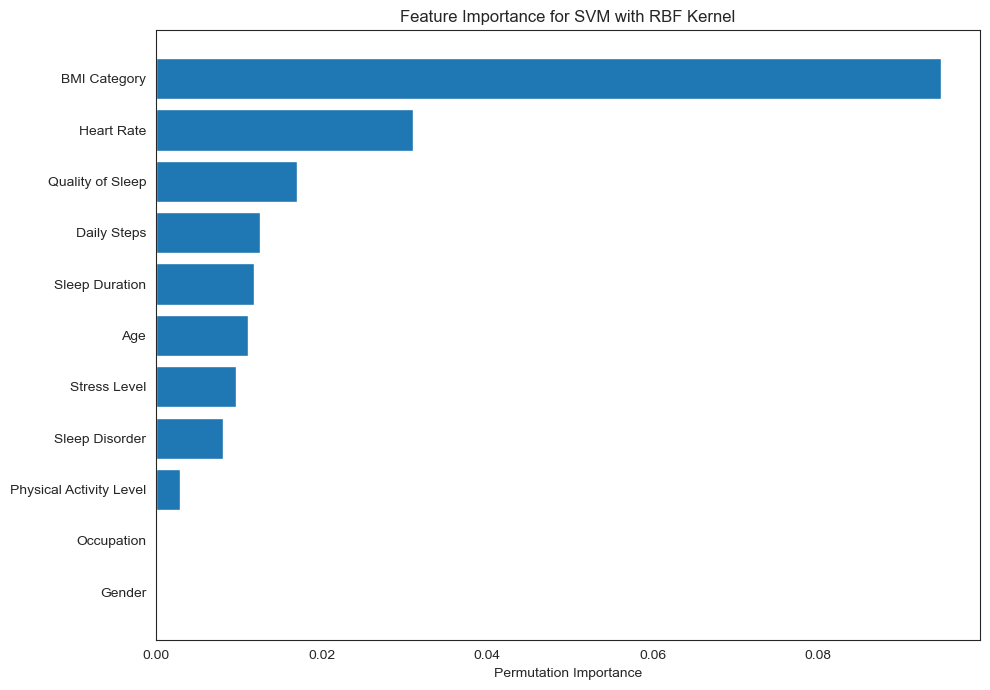

In [42]:
# Performing permutation-based feature importance.
perm_importance = permutation_importance(best_svm_model, X_test, y_test, n_repeats=30, random_state=42)

# Sorting the features by importance.
sorted_idx = perm_importance.importances_mean.argsort()

#  Visualizing the feature importance in a graph.
feature_names = sampled_data.columns[:-1]  # Assuming the last column is the target variable.
plt.figure(figsize=(10, 7))
plt.barh(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), feature_names[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance for SVM with RBF Kernel')
plt.tight_layout()
plt.show()



In [43]:
from sklearn.metrics import classification_report

report = classification_report(y_test, svm_predictions)
print(report)

              precision    recall  f1-score   support

    Insomnia       0.79      1.00      0.88        15
        None       0.94      1.00      0.97        15
 Sleep Apnea       1.00      0.67      0.80        15

    accuracy                           0.89        45
   macro avg       0.91      0.89      0.88        45
weighted avg       0.91      0.89      0.88        45



The model excels in accurately detecting *None* and *Insomnia* with both high precision and recall.

However, when it comes to *Sleep Apnea*, while the model maintains a high level of precision, its recall is slightly lower. This implies that while it correctly identifies examples as *Sleep Apnea* it may miss some genuine cases of this class.

The model's overall accuracy is impressive at 89%, indicating strong overall performance.

Both weighted and unweighted averages show a consistent performance across classes, yet there remains room for improvement, particularly in enhancing the recall for the *Sleep Apnea* class.

In summary, the model demonstrates robust performance but may benefit from fine-tuning or additional data, especially to enhance recall for the *Sleep Apnea* class.

**I'm finishing my analysis here as I didn't have enough time to conduct further investigations at the moment. I plan to revisit this notebook as soon as possible. I hope you've enjoyed it, even though it may have been a bit disorganized.**